In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = DecisionTreeRegressor(random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds), r2_score(y_valid, preds), mean_absolute_percentage_error(y_valid, preds)

### Importación de datos

In [64]:
data = pd.read_excel('precios_inmobiliarios.xlsx')
data.drop(columns=["Precio en soles corrientes"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           88799 non-null  int64  
 1   Trimestre                     88799 non-null  int64  
 2   Precio en dólares corrientes  88799 non-null  float64
 3   Tipo de cambio                88799 non-null  float64
 4   IPC                           88799 non-null  float64
 5   Distrito                      88799 non-null  object 
 6   Superficie                    88799 non-null  float64
 7   Número de habitaciones        88786 non-null  float64
 8   Número de baños               88764 non-null  object 
 9   Número de garajes             87248 non-null  float64
 10  Piso de ubicación             88799 non-null  object 
 11  Vista al exterior             88799 non-null  object 
 12  Años de antigüedad            87077 non-null  float64
dtypes

In [65]:
data["Número de baños"] = pd.to_numeric(data['Número de baños'], errors='coerce')
data["Piso de ubicación"] = pd.to_numeric(data['Piso de ubicación'], errors='coerce')
data["Vista al exterior"] = pd.to_numeric(data['Vista al exterior'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           88799 non-null  int64  
 1   Trimestre                     88799 non-null  int64  
 2   Precio en dólares corrientes  88799 non-null  float64
 3   Tipo de cambio                88799 non-null  float64
 4   IPC                           88799 non-null  float64
 5   Distrito                      88799 non-null  object 
 6   Superficie                    88799 non-null  float64
 7   Número de habitaciones        88786 non-null  float64
 8   Número de baños               88763 non-null  float64
 9   Número de garajes             87248 non-null  float64
 10  Piso de ubicación             84381 non-null  float64
 11  Vista al exterior             84742 non-null  float64
 12  Años de antigüedad            87077 non-null  float64
dtypes

In [66]:
data.head()

,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,IPC,Distrito,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,1998,1,140000.0,2.782715,73.129821,La Molina,155.0,3.0,1.0,0.0,2.0,0.0,3.0
1,1998,1,69800.0,2.782715,73.129821,Miraflores,120.0,3.0,1.0,0.0,8.0,0.0,10.0
2,1998,1,39900.0,2.782715,73.129821,Miraflores,100.0,3.0,1.0,0.0,9.0,0.0,0.0
3,1998,1,105000.0,2.782715,73.129821,Miraflores,150.0,3.0,1.0,0.0,4.0,0.0,0.0
4,1998,1,78000.0,2.782715,73.129821,San Borja,125.0,3.0,1.0,0.0,1.0,0.0,3.0


In [101]:
# Selección del target
y = data["Precio en dólares corrientes"]
# Predictores o features
melb_predictors = data.drop(['Precio en dólares corrientes'], axis=1)

In [102]:
X = melb_predictors.select_dtypes(exclude=['object'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Métricas para medir el performance de modelos de regresión

MAE: Mean Absolute Error

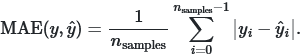

Coeficiente de determinación (R2)

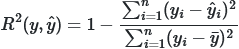

MAPE: Mean Absolute Percentage

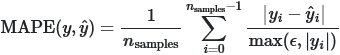

**Modelo de Árbol de Decisión para regresión**

### Eliminación de columnas con valores nulos

In [107]:
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

mae, r2, mape = score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid)

print("MAE:", mae)
print("R2:", r2)
print("MAPE:", mape)

MAE: 41416.87765828578
R2: 0.5901158607880119
MAPE: 0.3561234218641949


### Con imputación de los valores nulos

In [104]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

mae, r2, mape = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)

print("MAE:", mae)
print("R2:", r2)
print("MAPE:", mape)

MAE: 39623.64500640186
R2: 0.5555569528393935
MAPE: 0.3425284663777109


### Añadiendo variables que identifiquen los datos imputados

In [105]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

mae, r2, mape = score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid)

print("MAE:", mae)
print("R2:", r2)
print("MAPE:", mape)

MAE: 39415.68798393742
R2: 0.5801184722959588
MAPE: 0.34126223353847934


Utilizando el primer modelo

In [119]:
nombres_caracteristicas = X.columns

In [123]:
#Llamamos al constructor
model = DecisionTreeRegressor( random_state=0)

#Entrenamos al modelo
modelo = model.fit(reduced_X_train, y_train)


In [109]:
import matplotlib.pyplot as plt 
from sklearn import tree

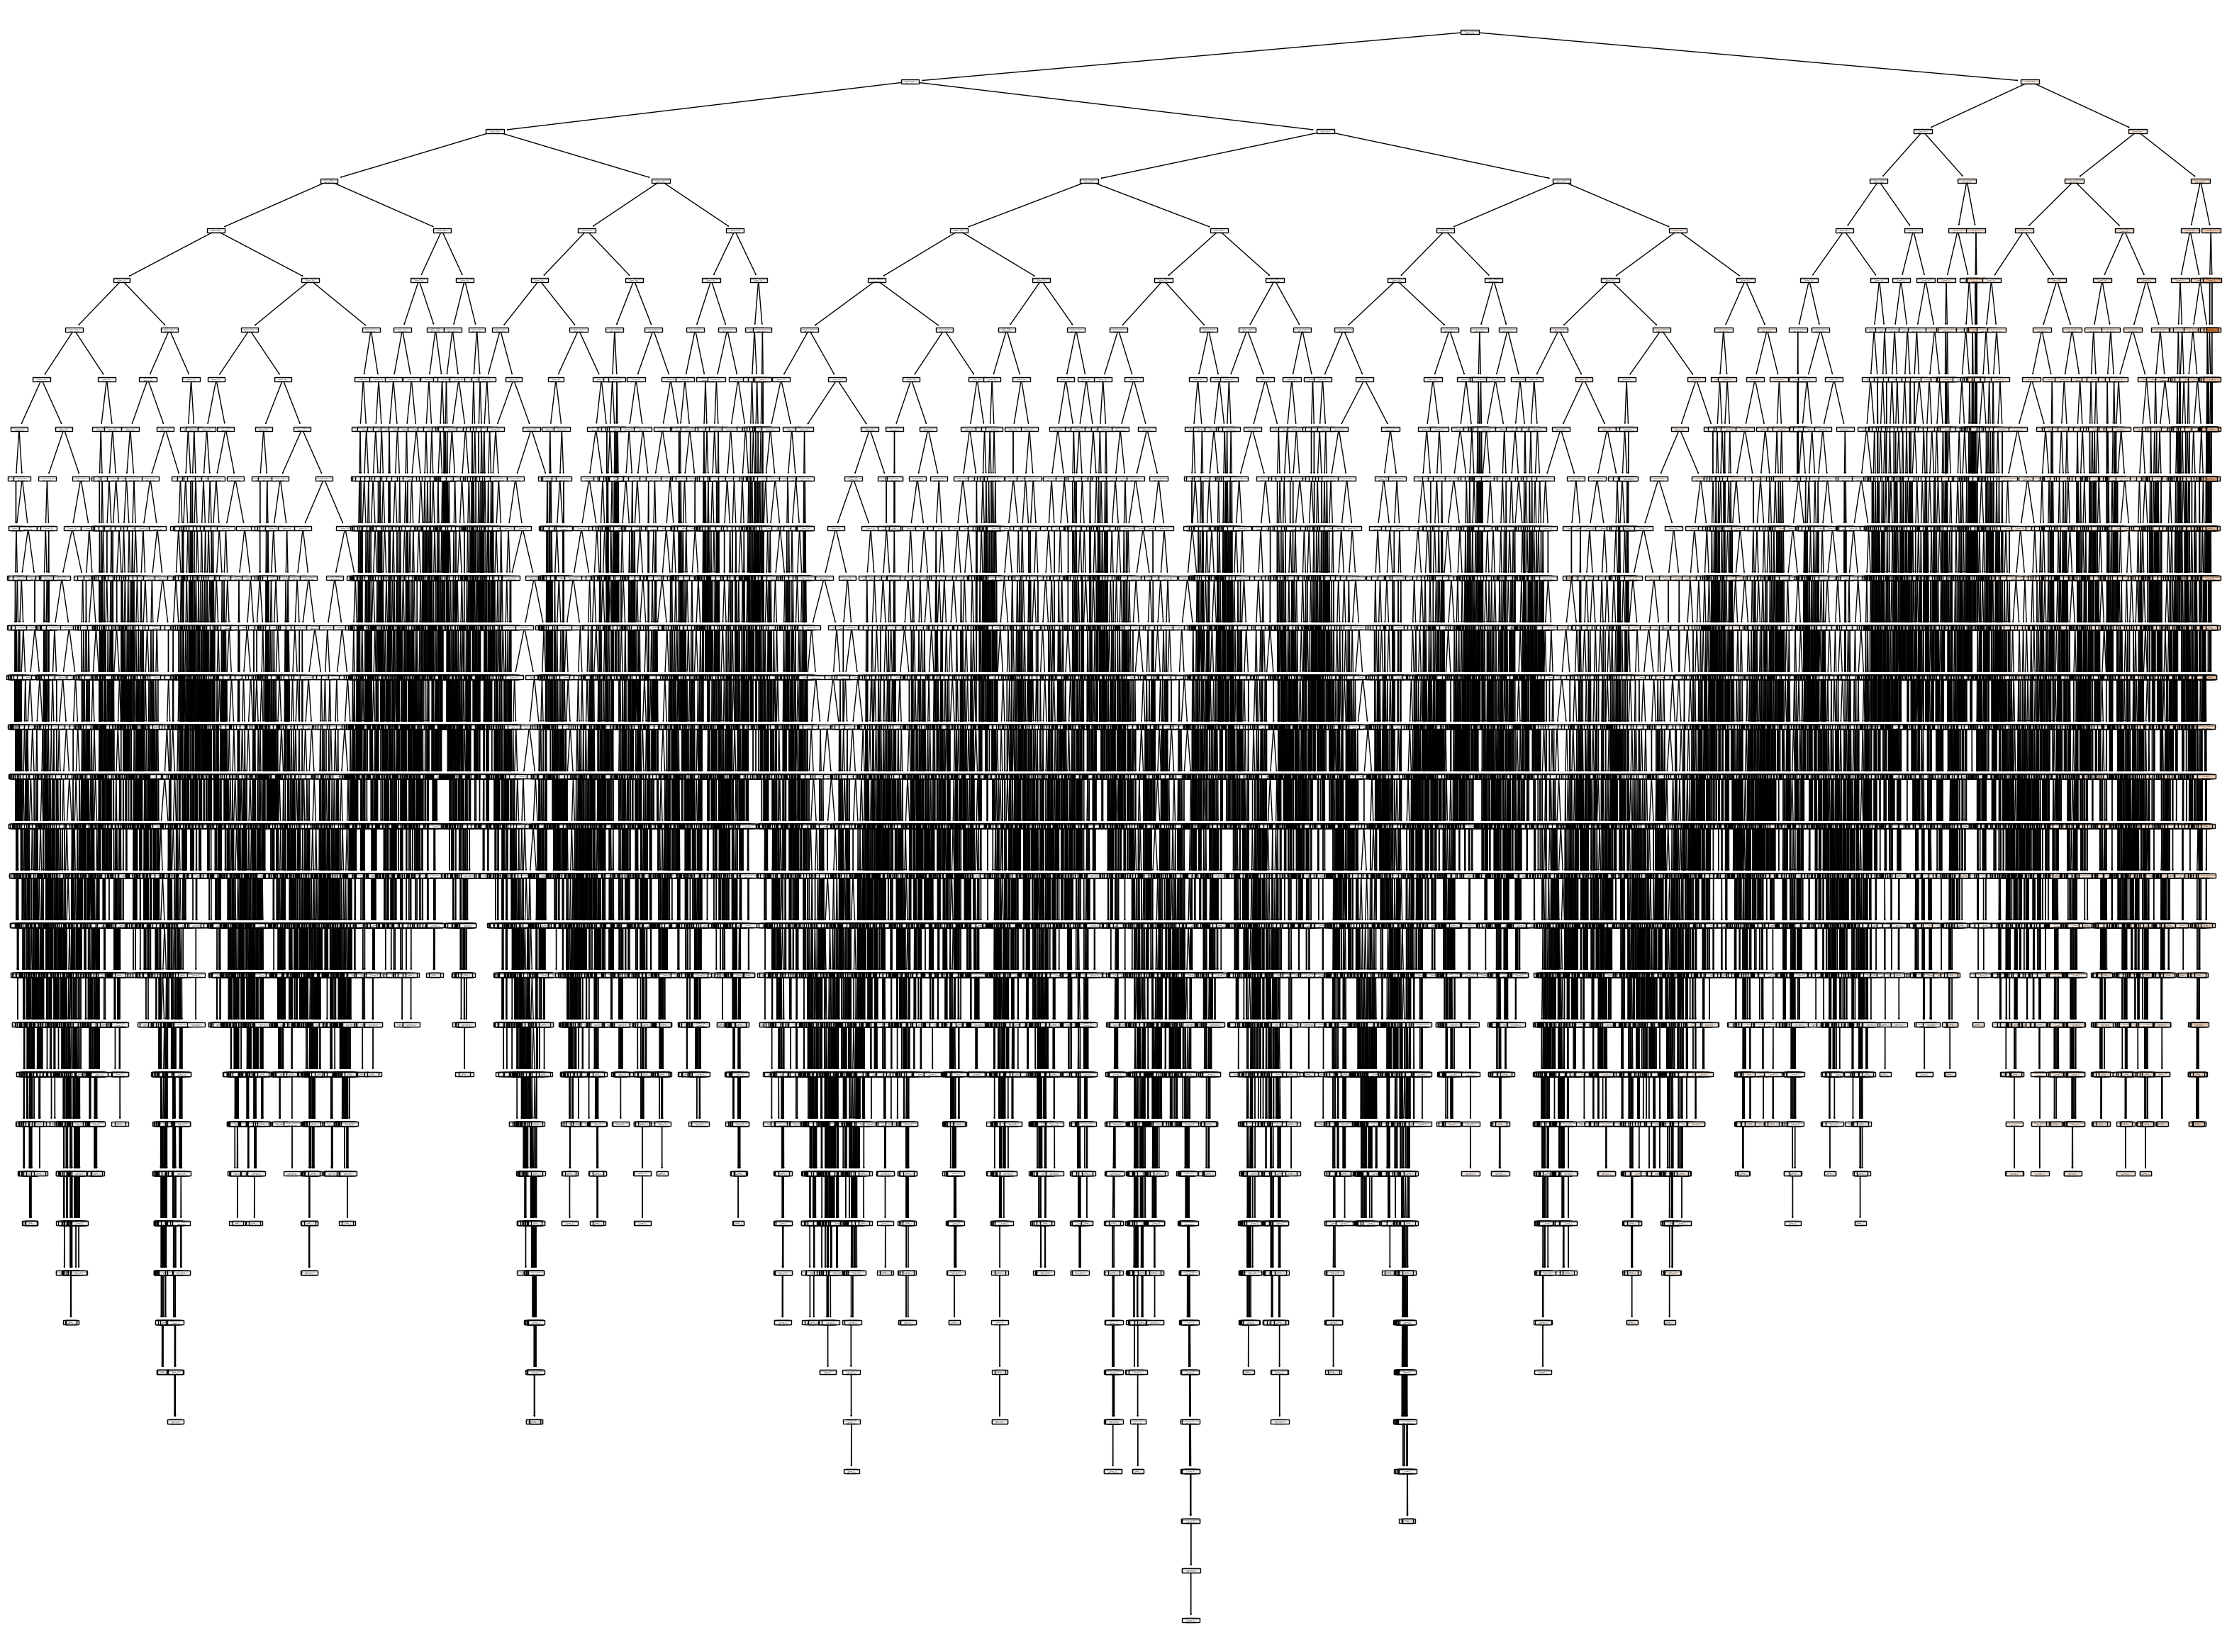

In [112]:
fig = plt.figure(figsize=(40,30))

tree.plot_tree(modelo,feature_names=list(X.columns.values), class_names=list(y.values), filled=True)

plt.show()

In [124]:
imputed_X_valid

,Año,Trimestre,Tipo de cambio,IPC,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,2013.0,1.0,2.574636,110.255742,98.45,2.0,1.0,0.000000,2.0,1.0,5.000000
1,2010.0,1.0,2.849903,100.711354,110.00,3.0,2.0,0.000000,2.0,1.0,0.000000
2,2011.0,1.0,2.778988,103.085147,220.00,4.0,1.5,1.000000,7.0,1.0,46.000000
3,2021.0,2.0,3.794436,137.633573,50.00,1.0,1.0,2.000000,0.0,1.0,6.000000
4,2019.0,1.0,3.323343,130.736665,174.00,3.0,3.0,0.859707,0.0,1.0,9.046222
...,...,...,...,...,...,...,...,...,...,...,...
17755,2023.0,2.0,3.699146,160.126657,82.00,3.0,1.0,1.000000,0.0,1.0,0.000000
17756,2022.0,4.0,3.894966,155.115938,92.00,2.0,3.0,0.000000,0.0,1.0,10.000000
17757,2022.0,4.0,3.894966,155.115938,63.00,3.0,2.0,0.000000,0.0,1.0,1.000000
17758,2015.0,4.0,3.322562,121.277125,79.00,3.0,2.0,0.000000,10.0,1.0,6.000000


In [125]:
import numpy as np

features = np.array([2024, 1, 3.75, 103.2, 240]).reshape(1, -1)
prediction = modelo.predict(features)
prediction

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([405000.])